```pip install box2d-py``` after installing Visual C++ and rebooting.

In [1]:
from importlib import reload
import cartpole_lab.charts
reload(cartpole_lab.charts)

import numpy as np
import gym
import cartpole_lab.agent
import cartpole_lab.deeprico
import cartpole_lab.approximator
reload(cartpole_lab.agent)
reload(cartpole_lab.deeprico)
reload(cartpole_lab.approximator)
from cartpole_lab.deeprico import deep_rico

env = gym.make('LunarLander-v2')
observation = env.reset()

Using TensorFlow backend.


avg of last 100 episodes: -126.518837


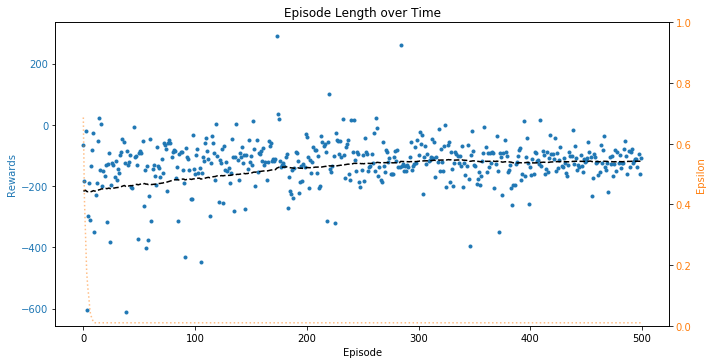

In [2]:
agent = deep_rico(env)
agent.train(500)

In [10]:
ngamma = 1/40
gamma = 1-ngamma
ngamma, gamma

(0.025, 0.975)

avg of last 100 episodes: -568.206607


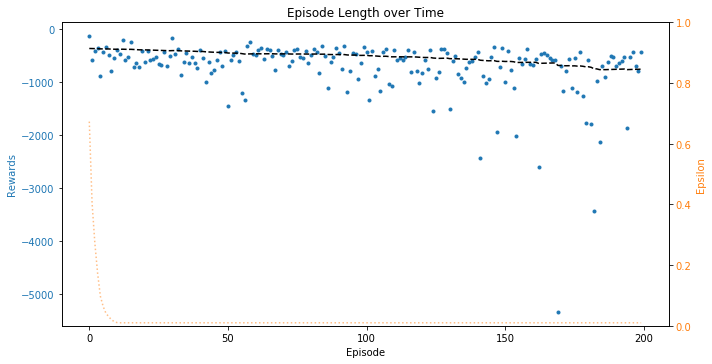

In [3]:
low_gamma = deep_rico(env)
low_gamma.policy.gamma = 0.999
low_gamma.train(200)

avg of last 100 episodes: -131.273467


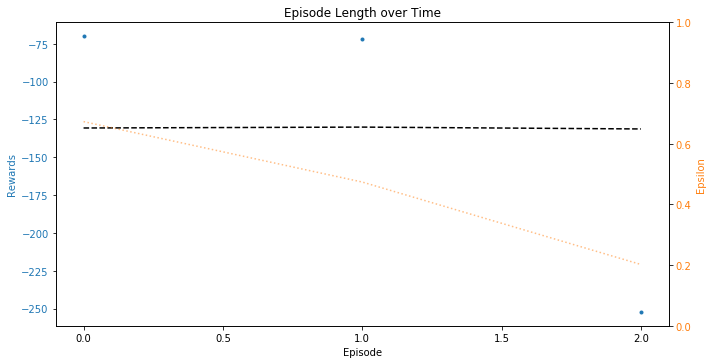

In [ ]:
gamma99 = deep_rico(env)
gamma99.policy.gamma = 0.99
gamma99.train(10000)

In [13]:
low_gamma.policy.model.save(r'models/lander-gamma-0999.h5')

avg of last 100 episodes: -736.906854


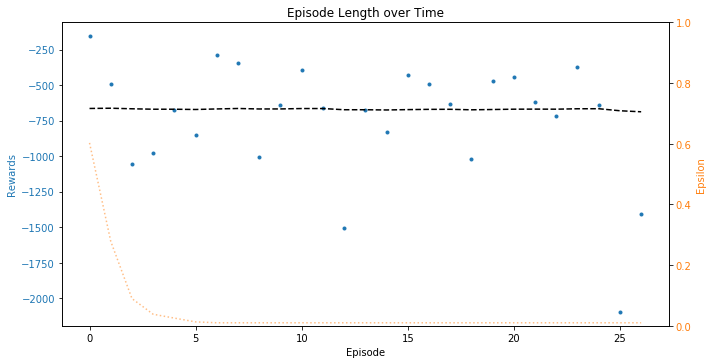

KeyboardInterrupt: 

In [8]:
low_gamma.train(500)

In [4]:
agent.demo()

score= -159.1518484455246
score= -122.78004225612753
score= -153.15614864071694
score= -87.3788574252751
score= -170.8434546971984
score= -239.96642993873363
score= -101.74285008120995
score= -181.30449669916757
score= -194.64580286226283
score= -157.7404737473863
Avg rewards= -156.87104047936026


In [5]:
noob = deep_rico(env) # save an untrained one for comparison

In [3]:
def total_rewards(episode):
    return sum([reward for (state, action, reward, next_state, done) in episode])
        
def run_summary(agent, render=True):
    episode = agent.run_episode(render=render)
    return total_rewards(episode)

def run_episodes(agent, count=10, render=True):
    scores = []
    for _ in range(count):
        score = run_summary(agent, render=render)
        print('score=%f' % score)
        scores.append(score)
    print('Mean score=%f' % np.mean(scores))
        

In [7]:
env.close()

avg of last 100 episodes: -185.124037


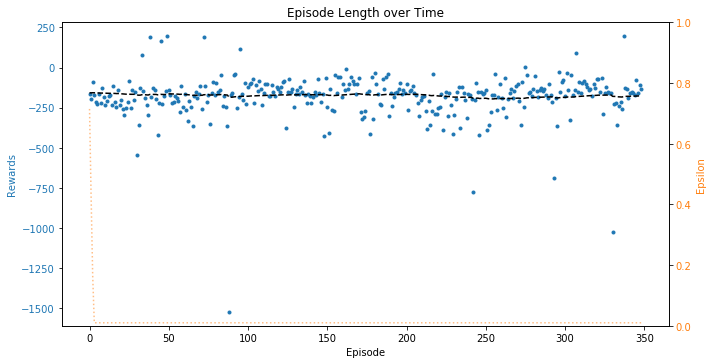

KeyboardInterrupt: 

In [12]:
agent.train(500)

In [21]:
run_episodes(agent, count=5)

score=-382.065324
score=-298.185657
score=-110.661777
score=-540.666944
score=-64.293288
Mean score=-279.174598


In [74]:
agent.policy.peek()

array([4.2793612, 4.8437734, 4.198536 , 4.87267  ], dtype=float32)

ValueError: operands could not be broadcast together with shapes (3,) (0,) 

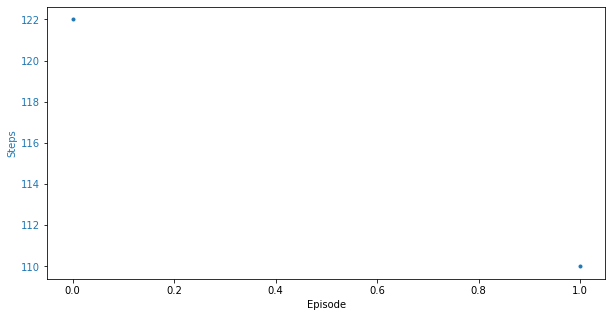

In [78]:
agent.train(200,render=True)

In [6]:
a = [1,2,3,4]
a[1:-2]

[2]

In [17]:
len(agent.policy.snapshots)

109055

In [24]:
agent.policy.snapshots[0:10]

TypeError: sequence index must be integer, not 'slice'

In [20]:
agent.policy.peek()

array([ 4.80480051,  4.95879793,  4.47204924,  4.80873108], dtype=float32)